In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

In [2]:
n_samples = 150
n_clusters = 3
x, y = make_blobs(n_samples=n_samples, centers=n_clusters,
                  cluster_std=0.5, random_state=0)

model = GaussianMixture(n_components=n_clusters,
                        covariance_type='full',
                       random_state=0)
model.fit(x)

GaussianMixture(n_components=3, random_state=0)

In [3]:
centers = model.means_
covariances = model.covariances_

In [26]:
covariances[0]

array([[ 0.23864073, -0.0478303 ],
       [-0.0478303 ,  0.21529089]])

In [4]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()

    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)

    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    for nsig in range(1, 4):
        ellip = Ellipse(xy=position, width=nsig * width,
                       height=nsig * height, angle=angle, **kwargs)
        ax.add_patch(ellip)

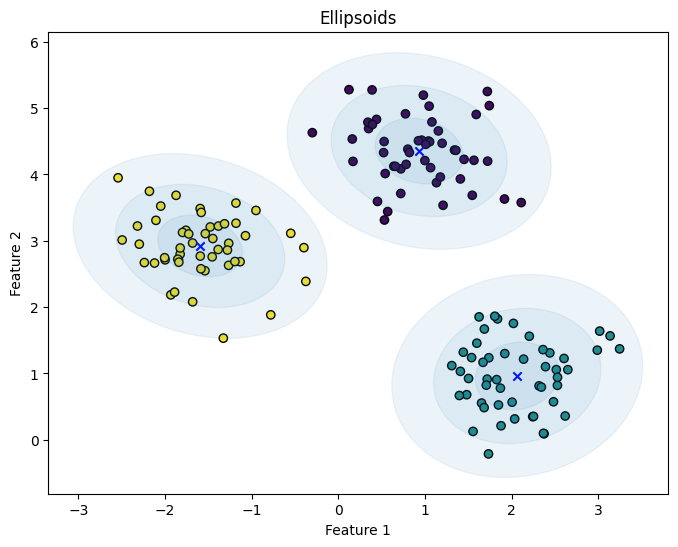

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis',
           marker='o', edgecolor='k')
for i in range(n_clusters):
    plt.scatter(centers[i][0], centers[i][1], marker='x', c='blue')
    draw_ellipse(centers[i], covariances[i], alpha=0.08, color='tab:blue')

plt.title('Ellipsoids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

---

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

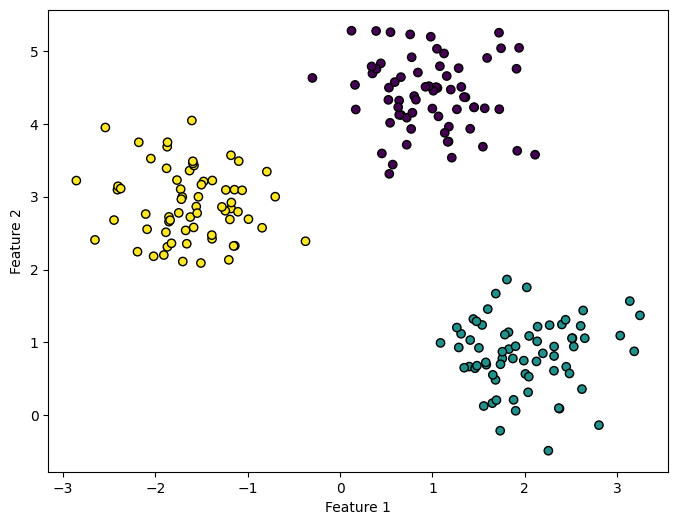

In [7]:
n_samples = 200
n_clusters = 3

x, y = make_blobs(n_samples=n_samples, centers=n_clusters,
                  cluster_std=0.5, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [10]:
df = pd.read_csv('./dataset/technical_support.csv')
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [11]:
df.shape

(23, 8)

In [12]:
attr = df.iloc[:, 1:]
attr.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,170,1.3,32,0.04,0.0,75,25
1,12,2.0,150,0.01,0.5,5,95
2,5,1.0,35,0.02,0.2,90,10
3,3,2.0,8,0.01,0.7,5,95
4,45,2.3,54,0.15,0.0,99,1


In [13]:
attr_scaled = attr.apply(zscore)
attr_scaled.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074


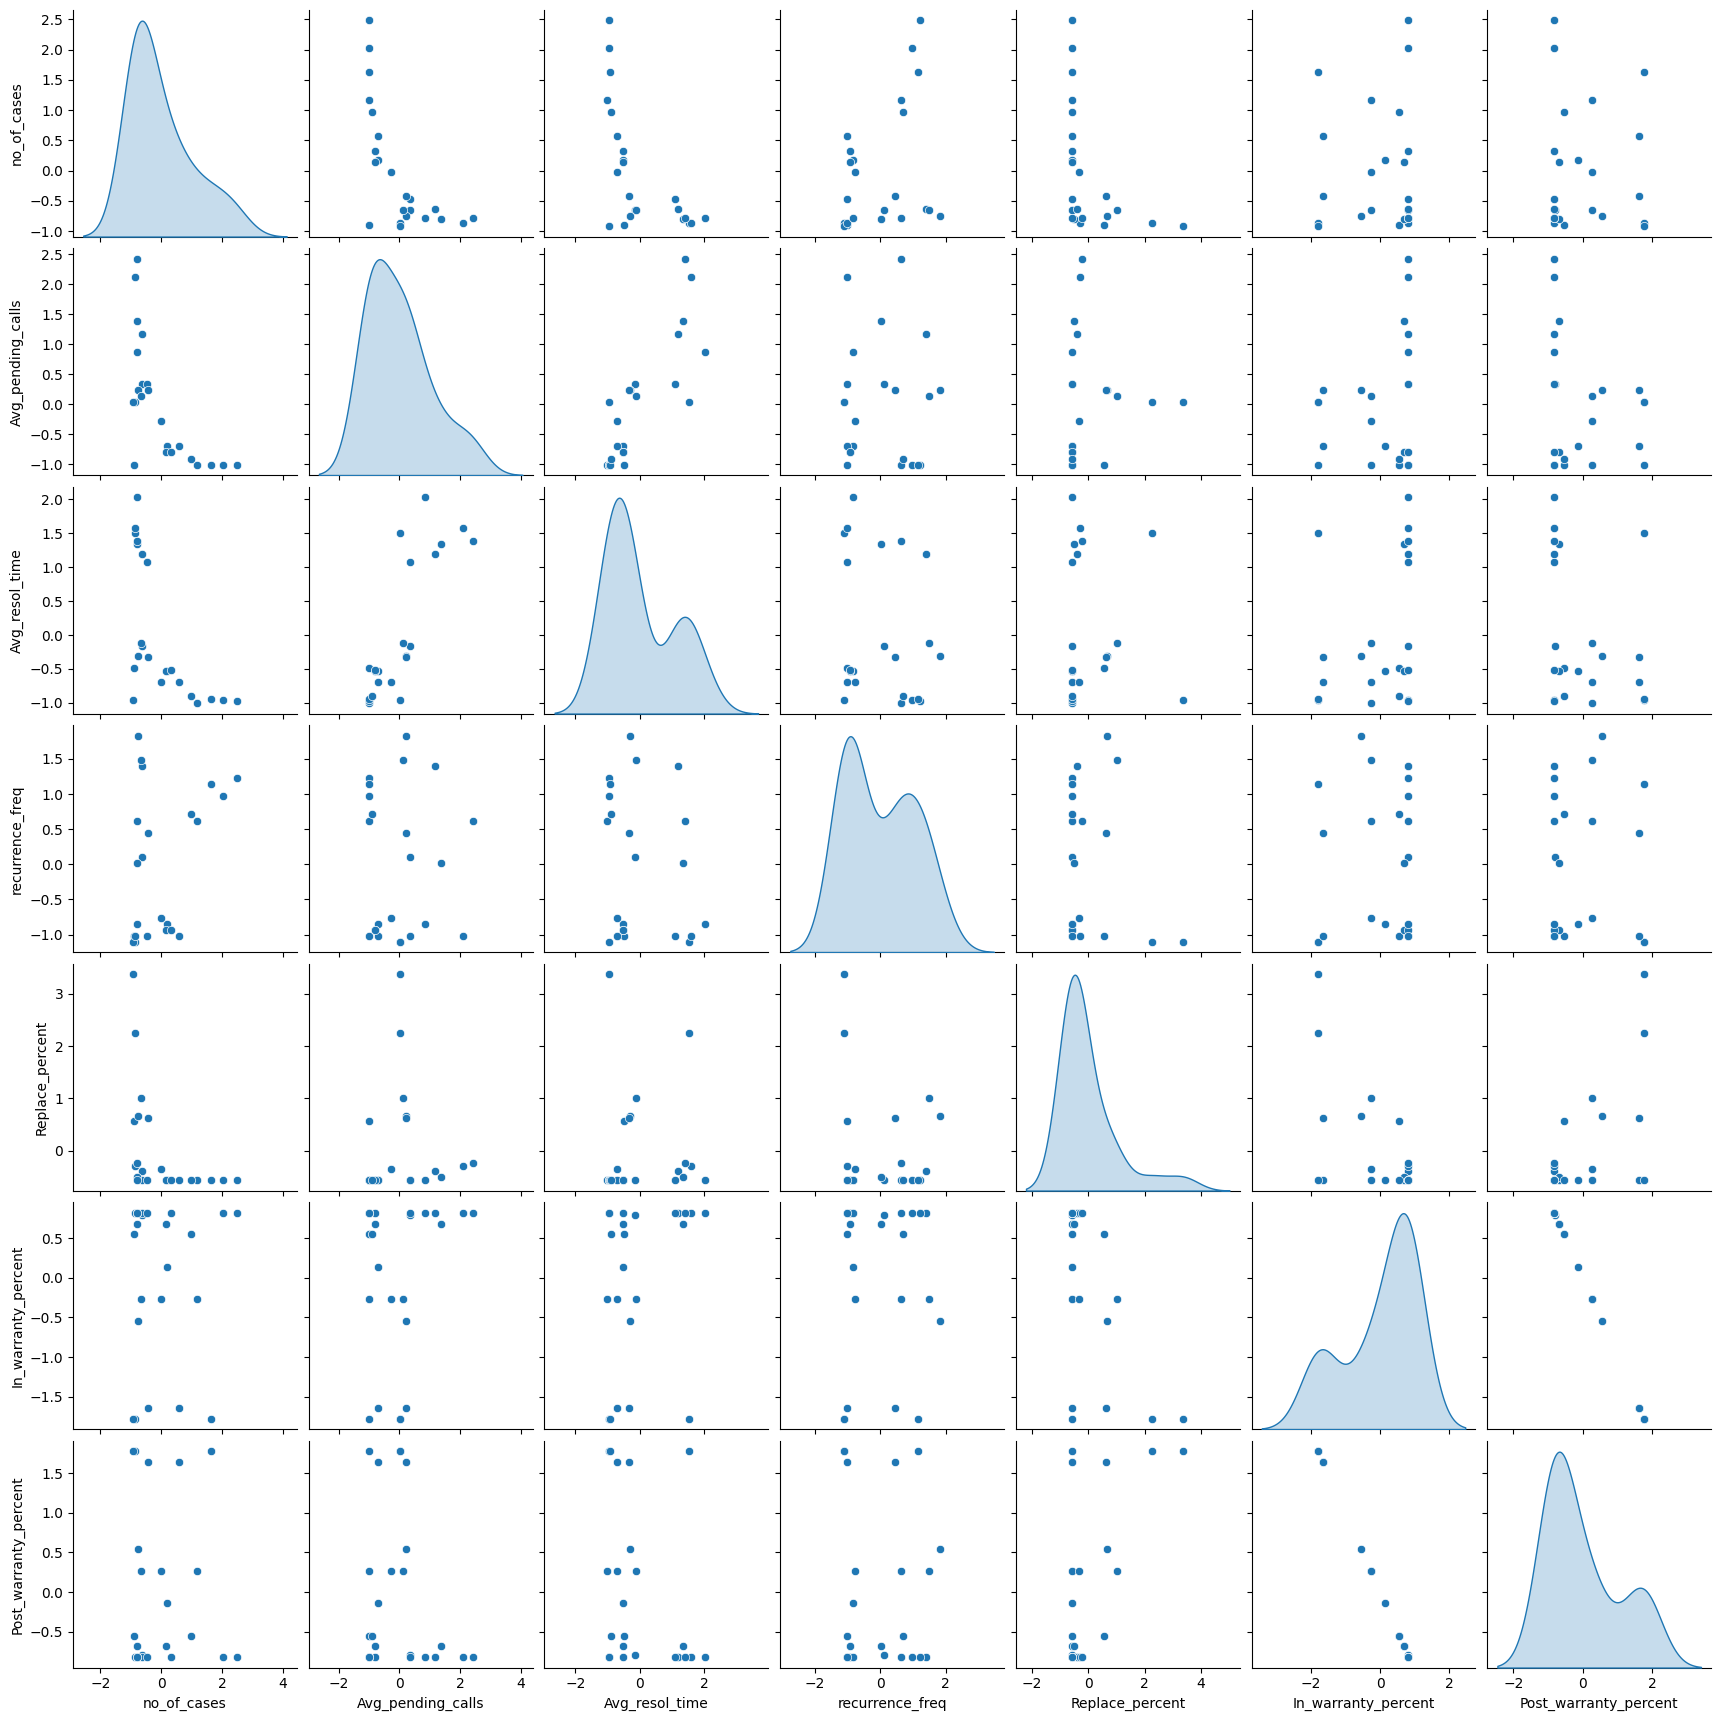

In [14]:
sns.pairplot(attr_scaled, diag_kind='kde')
plt.show()

In [15]:
from scipy.spatial.distance import cdist
clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)

    model.fit(attr_scaled)
    prediction = model.predict(attr_scaled)

    meanDistortions.append(
        sum(
            np.min(
                cdist(attr_scaled,
                      model.cluster_centers_,
                     'euclidean'), axis=1
            )
        ) / attr_scaled.shape[0]
    )

In [16]:
meanDistortions

[2.5132186215720433,
 2.1007390282112,
 1.633958126099869,
 1.496169830570091,
 1.219279020313038,
 1.1386988108578309,
 0.9815040637871222,
 0.8997287854325582,
 0.8026011571985564,
 0.6916671808556161]

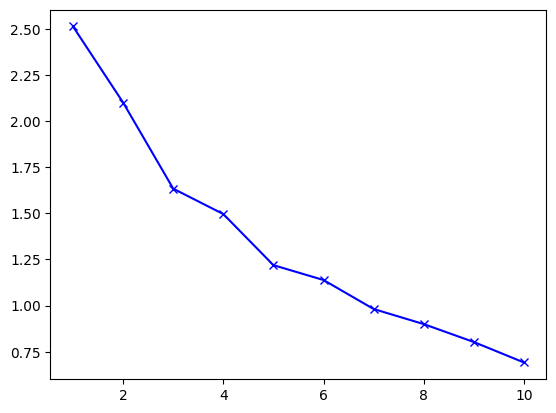

In [17]:
plt.plot(clusters, meanDistortions, 'bx-')

plt.show()

In [18]:
final_model = KMeans(3)
final_model.fit(attr_scaled)
prediction = final_model.predict(attr_scaled)

In [19]:
df['Clusters'] = prediction
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


In [20]:
df['Clusters'].value_counts()

Clusters
1    9
0    9
2    5
Name: count, dtype: int64

In [21]:
df[df['Clusters'] == 0]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,0
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,0
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,0
10,Mobile screen blanks on use of phone,23,4.3,143,0.21,0.06,100,0,0
13,AC remote does not work,24,2.8,180,0.04,0.00,100,0,0
18,Factory settings not working,72,2.3,125,0.02,0.00,100,0,0
20,Battery backup does not get fully charged,29,2.2,45,0.35,0.22,50,50,0
21,Battery does not last full 8 hrs,43,2.1,56,0.31,0.28,60,40,0


In [22]:
df[df['Clusters'] == 1]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,1
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,1
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,1
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,1
12,AC controller sofware missing,193,1.2,33,0.03,0.00,100,0,1
14,Remote Keys get stuck,450,1.0,8,0.25,0.00,100,0,1
15,Unable to operate menu from remote,520,1.0,7,0.28,0.00,100,0,1
17,Freshner holder stuck,140,1.7,23,0.05,0.04,60,40,1
19,WIFI connectivity breaks,290,1.1,11,0.22,0.00,90,10,1


In [23]:
df[df['Clusters'] == 2]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,2
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,2
11,Cluttered with popup messages,230,1.3,23,0.02,0.00,10,90,2
16,Motor noise from the system,390,1.0,9,0.27,0.00,5,95,2
22,Fan speed varies at on its own,78,2.2,44,0.19,0.21,10,90,2


In [24]:
import pickle
pickle.dump(final_model, open('kmean.pkl', 'wb'))

In [25]:
df.columns

Index(['PROBLEM_TYPE', 'no_of_cases', 'Avg_pending_calls', 'Avg_resol_time',
       'recurrence_freq', 'Replace_percent', 'In_warranty_percent',
       'Post_warranty_percent', 'Clusters'],
      dtype='object')